`About Dataset`
Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

Acknowledgements
From Udemy's Machine Learning A-Z course.

I am new to Data science field and want to share my knowledge to others

https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv

Inspiration
By the end of this case study , you would be able to answer below questions.
1- How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.
2- Who are your target customers with whom you can start marketing strategy [easy to converse]
3- How the marketing strategy works in real world

#data processing#

In [2]:
#data processing)
import numpy as np
import pandas as pd

In [1]:
#libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objs as go
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [3]:
#preprocessing#
from sklearn.cluster import KMeans

بالطبع، سأشرح خوارزمية KMeans بشكل أكثر تفصيلًا.

خوارزمية KMeans هي خوارزمية تجميع تهدف إلى تقسيم مجموعة من النقاط في الفضاء إلى عدة مجموعات (clusters) بحيث تكون النقاط داخل كل مجموعة متجانسة وتكون المجموعات متباعدة بين بعضها البعض. تستخدم هذه الخوارزمية عادةً في مجال استكشاف البيانات والتحليل الإحصائي.

In [4]:
cu=pd.read_csv("/content/Mall_Customers.csv")

In [5]:
cu.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
cu.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [14]:
cu.drop(columns="CustomerID",axis=1,inplace=True)

In [7]:
cu.shape

(200, 5)

In [15]:
cu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [16]:
cu.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
cu.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


#Data visualization

In [24]:
numerical_features = cu.select_dtypes(exclude = ['object']).columns.tolist()
categorical_featrues = cu.select_dtypes(exclude = ['object']).columns.tolist()

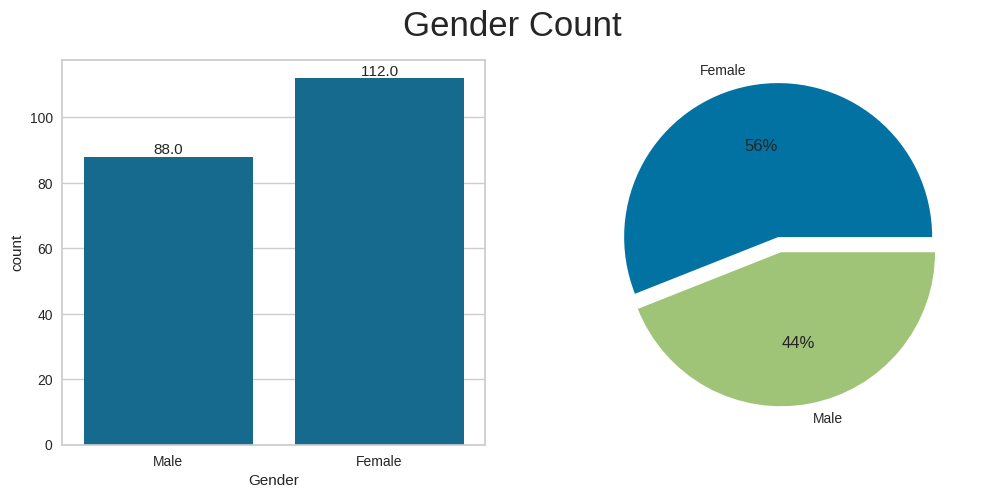

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
ax = sns.countplot(cu, x = 'Gender', ax = axes[0])
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.subplot(1,2,2)
plt.pie(cu['Gender'].value_counts(), labels=['Female', 'Male'], explode=[0.1, 0], autopct='%.0f%%')
fig.suptitle('Gender Count', fontsize = 25)
plt.show()

In our dataset, it seems like the ladies have a slight lead over the gentlemen as our female customers outnumber the male ones.

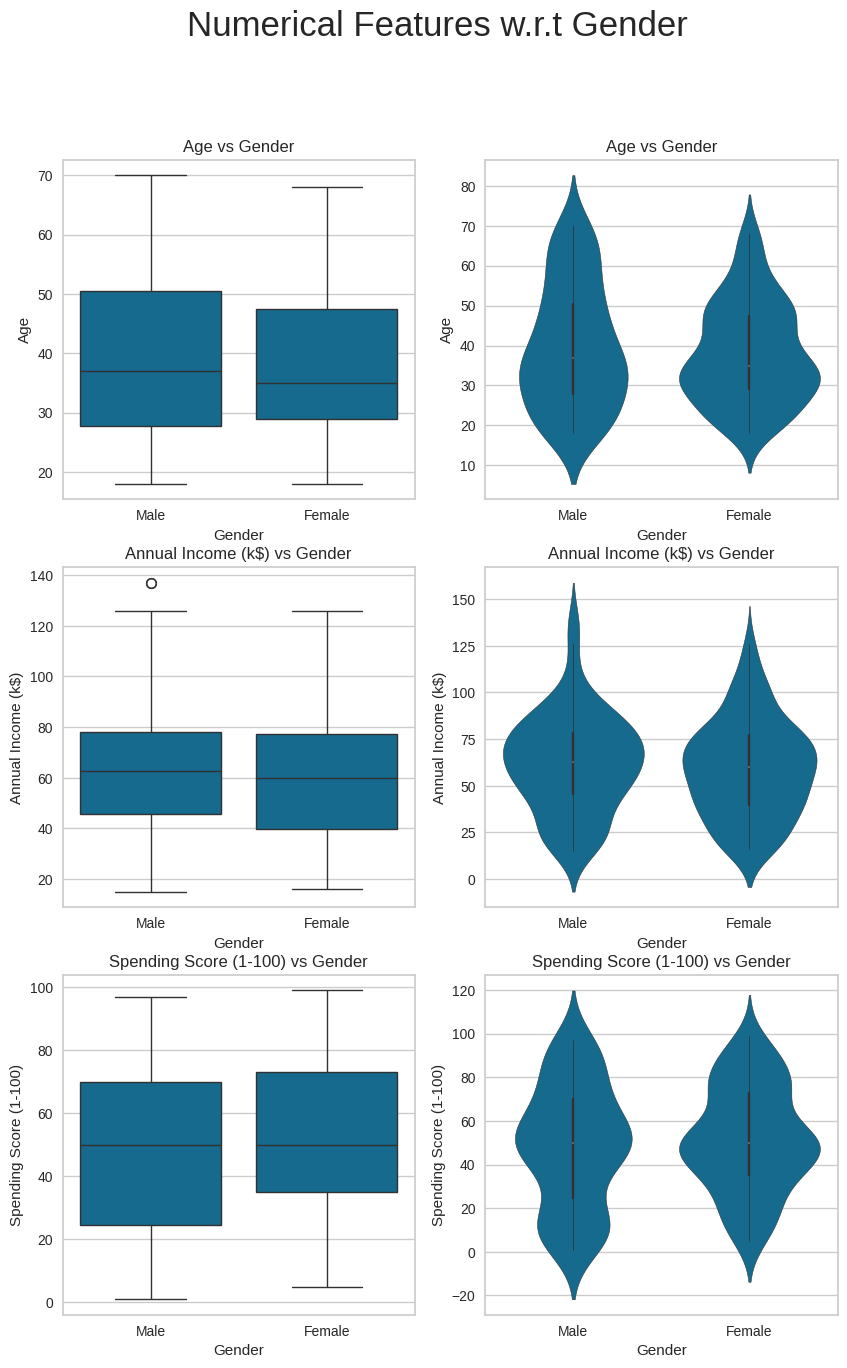

In [23]:
fig, axes = plt.subplots(nrows = 3, ncols = 2,figsize = (10,15))
for i, j in enumerate(numerical_features):
    ax = sns.boxplot(x = 'Gender',y = j, data = cu, ax = axes[i, 0])
    title = j + ' vs Gender'
    axes[i, 0].set_title(title)

    ax = sns.violinplot(x = 'Gender',y = j, data = cu, ax = axes[i, 1])
    title = j + ' vs Gender'
    axes[i, 1].set_title(title)
fig.suptitle('Numerical Features w.r.t Gender', fontsize = 25)
plt.show()

Age:

Females in our dataset typically fall between the ages of 30 to just below 50, while for males, it's from just under 30 to 50.
Both genders seem to have a common age sweet spot around 30 to 35, where there's a surge in numbers.
Interestingly, the median age for males slightly edges out that of females.
Annual Income (k$):

When it comes to annual earnings, our Female customers usually start around 40k, whereas males often begin above this mark.
The median annual income for both Male and Female groups is around 60k.
It's worth noting that Male customers' income distribution drops sharply at the top, with some outliers, while Female customers' income spread is more balanced.
Spending Score (1-100):

Despite starting from different points—just below 40 for Females and just above 20 for Males—the median spending score for both groups is similar.
There's a notable cluster of spending scores around the median, especially for Females. However, Males also exhibit a smaller but significant cluster in the lower range of 0 to 20.

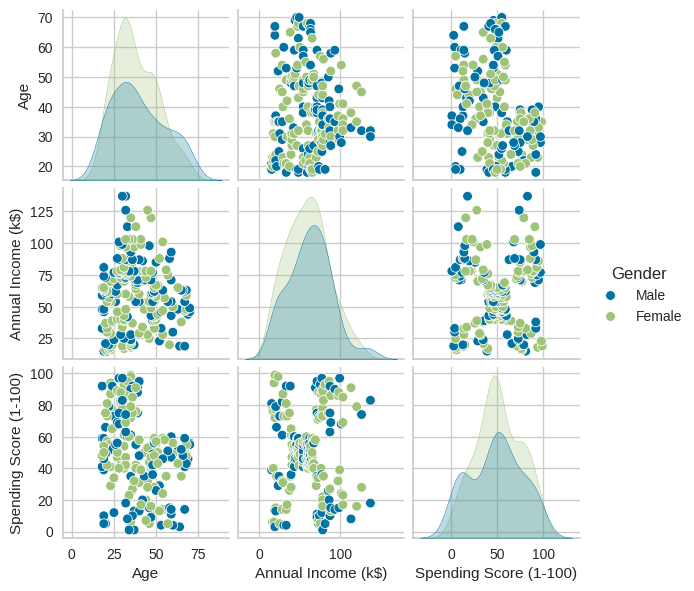

In [26]:
sns.pairplot(data=cu,hue='Gender',height=2)
plt.show()

Numerical Vs Numerical Features

In [29]:
from itertools import combinations, product
comb = list(combinations(numerical_features, 2))
print(comb)

[('Age', 'Annual Income (k$)'), ('Age', 'Spending Score (1-100)'), ('Annual Income (k$)', 'Spending Score (1-100)')]


In [30]:
comb = list(combinations(numerical_features, 2))

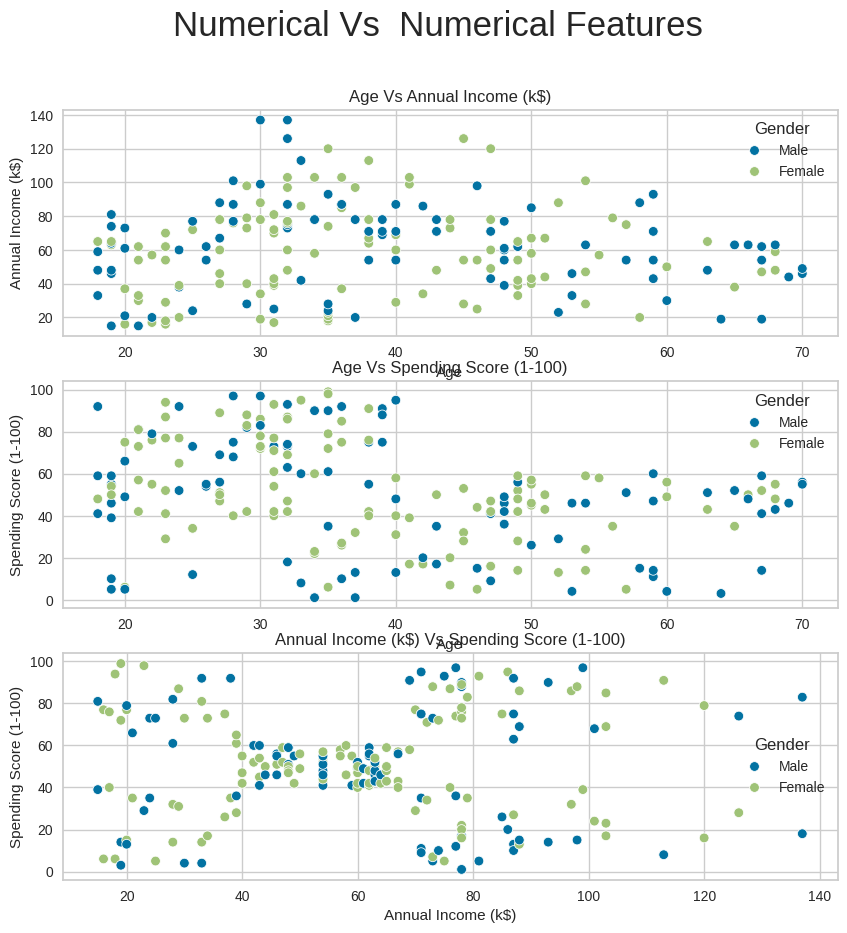

In [36]:
fig, axes = plt.subplots(3, 1, figsize = (10, 10))
for i, c in enumerate(comb):
    sns.scatterplot(data = cu, x = c[0], y = c[1], hue = 'Gender', ax = axes[i])
    axes[i].set_title(f"{c[0]} Vs {c[1]}")
fig.suptitle('Numerical Vs  Numerical Features', fontsize = 25)
plt.show()

Annual Income (k$):

No matter the age, our dataset shows a spread of annual income across the board. Gender doesn't seem to play a significant role in this aspect.
Spending Score (1-100):

Interestingly, folks in the 20 to 30 age range seem to have quite the knack for spending, with noticeably high spending habits.
Moving on to the 30 to 40 age group, we see a mix of spending extremes. Meanwhile, customers in the 40 to 70 age bracket tend to display more conservative spending habits.
Annual Income (k$) vs Spending Score (1-100):

Looking at the relationship between annual income and spending habits, we can spot five distinct customer groups.
For those with annual incomes between 0 to 40k, there are two main clusters based on spending score: one with scores between 0 to 40 and another with scores between 60 to 100.
In the middle ground, customers with incomes ranging from 40 to 70k tend to have spending scores between 40 to 60.
Lastly, the higher earners, with incomes from 70 to 140k, split into two groups: one with spending scores from 0 to 40 and another with scores from 60 to 100.

<ipython-input-38-5b78d4374145>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-38-5b78d4374145>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



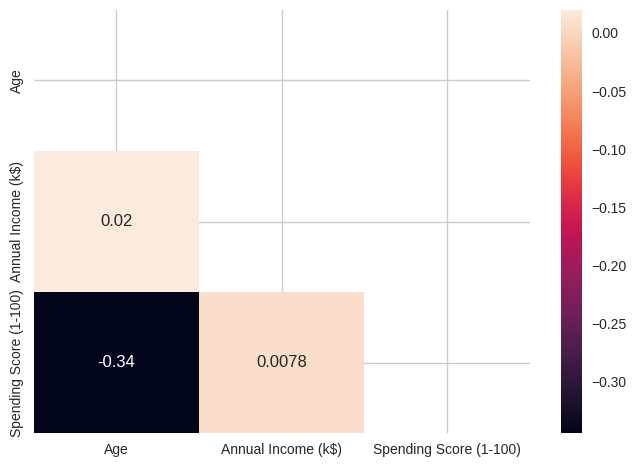

In [38]:
ut = np.triu(cu.corr())
sns.heatmap(cu.corr(method = 'spearman'), annot = True, mask = ut)
plt.show()

Spending Score (1-100) and Age display a negative correlation i.e if value of one feature increases, then another feature's value decreases and vice-versa.

In [45]:
cu['Gender'] = cu['Gender'].astype('category').cat.codes

<ipython-input-46-8f577713b95e>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.




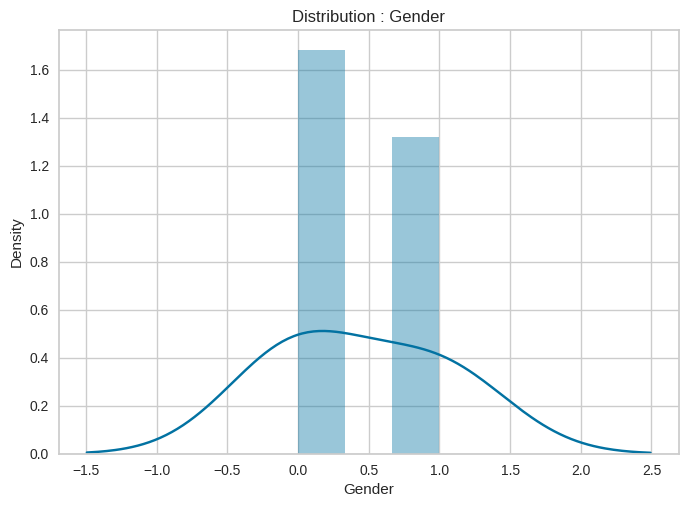

In [46]:
sns.distplot(cu['Gender'],kde = True, kde_kws = {'bw' : 1})
title = 'Distribution : Gender'
plt.title(title)
plt.show()



In [49]:
X = cu.iloc[:,[2,3]].values

In [51]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Choosing the number of clusters

WCSS  ->  Within Clusters Sum of Squares

In [52]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

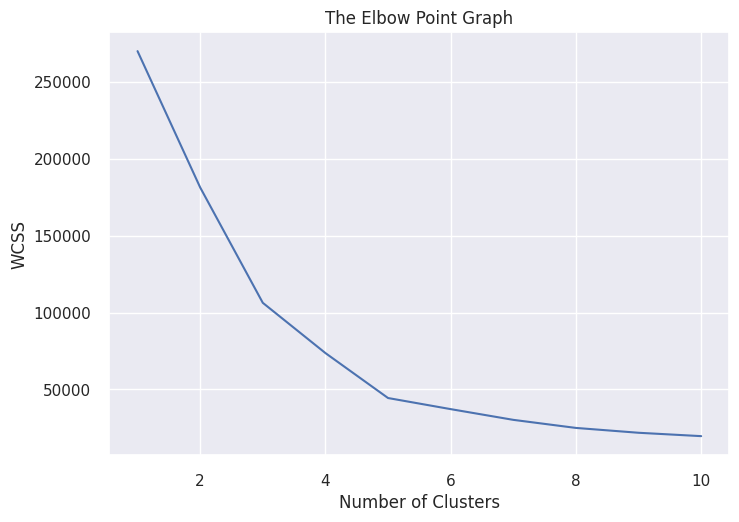

In [53]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



5 Clusters -  0, 1, 2, 3, 4

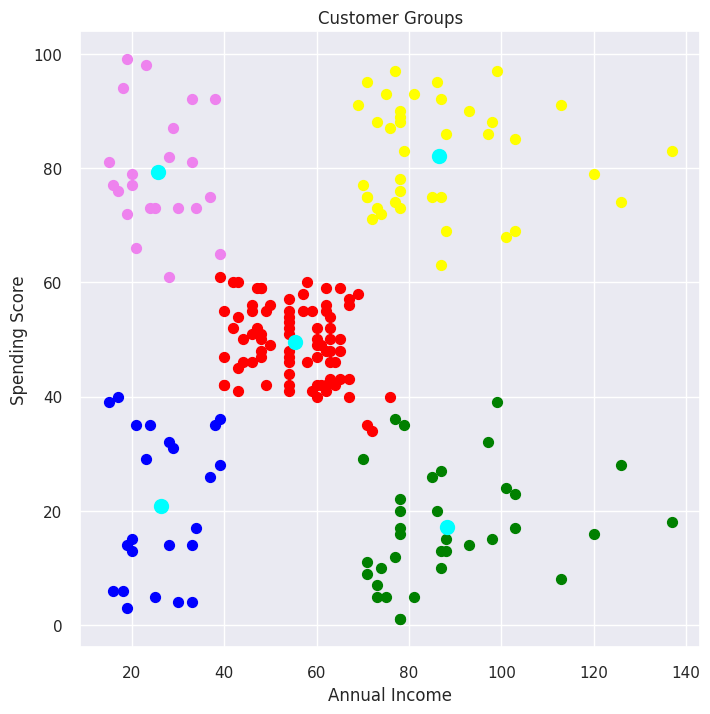

In [55]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()